In [103]:
from PIL import Image
import numpy as np
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt


In [104]:
# Função para carregar imagens e rótulos usando Pillow
def load_data(images_dir, labels_dir):
    images = []
    labels = []
    for filename in os.listdir(images_dir):
        if filename.endswith('.jpeg'):
            img_path = os.path.join(images_dir, filename)
            label_file_path = os.path.join(labels_dir, filename.replace('.jpeg', '.txt'))
            if os.path.exists(label_file_path):
                img = Image.open(img_path).convert('RGB')
                img = img.resize((32, 32))  # Redimensionar para 32x32
                images.append(np.array(img))  # Acumula diretamente como array
                with open(label_file_path, 'r') as label_file:
                    label = int(label_file.readline().split()[0].strip())  # Apenas o rótulo
                    labels.append(label)
            else:
                print(f"Rótulo ausente para {filename}")
    return np.stack(images), np.array(labels)


In [105]:
# Caminhos para os diretórios
images_dir = 'Images/'
labels_dir = 'labels/'

# Carregar os dados
images, labels = load_data(images_dir, labels_dir)

# Normalizar as imagens
images = images.astype('float32') / 255.0

# Dividir os dados em treino e teste
data_train, data_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [106]:
# Modelo CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=data_train.shape[1:]),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_18          │ (None, 32, 32, 3)      │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 502,157 (1.92 MB)

 Trainable params: 502,151 (1.92 MB)

 Non-trainable params: 6 (24.00 B)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.5945 - loss: 0.6664 - val_accuracy: 0.9333 - val_loss: 0.6366
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8960 - loss: 0.3486 - val_accuracy: 0.6667 - val_loss: 0.5492
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8722 - loss: 0.3272 - val_accuracy: 0.8000 - val_loss: 0.4587
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9233 - loss: 0.2176 - val_accuracy: 0.8667 - val_loss: 0.4337
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9120 - loss: 0.2654 - val_accuracy: 0.8000 - val_loss: 0.4536
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9203 - loss: 0.2266 - val_accuracy: 0.8667 - val_loss: 0.4384
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9277 - loss: 0.1997 - val_accuracy: 0.9333 - val_loss: 0.3985
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9423 - loss: 0.1530 - val_accuracy: 0.9333 - val_loss

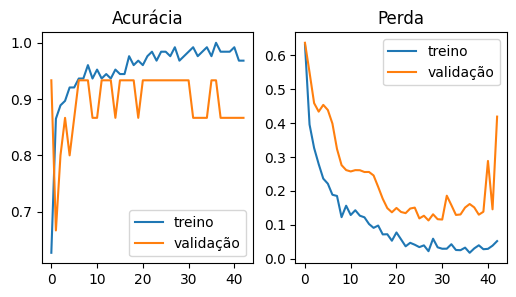

In [107]:
# EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Treinar o modelo
history = model.fit(data_train, labels_train, epochs=200, batch_size=32, validation_split=0.1, shuffle=True, callbacks=[early_stopping])


plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['treino', 'validação'])
plt.title('Acurácia')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['treino', 'validação'])
plt.title('Perda')
plt.show()

In [109]:
# Salvar o modelo
model.save('model_tomatoes.keras')

model = tf.keras.models.load_model('model_tomatoes.keras')

score = model.evaluate(data_test, labels_test)
print("Accuracy: {:.2f}%".format(score[1] * 100))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9132 - loss: 0.2040  
Accuracy: 91.67%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


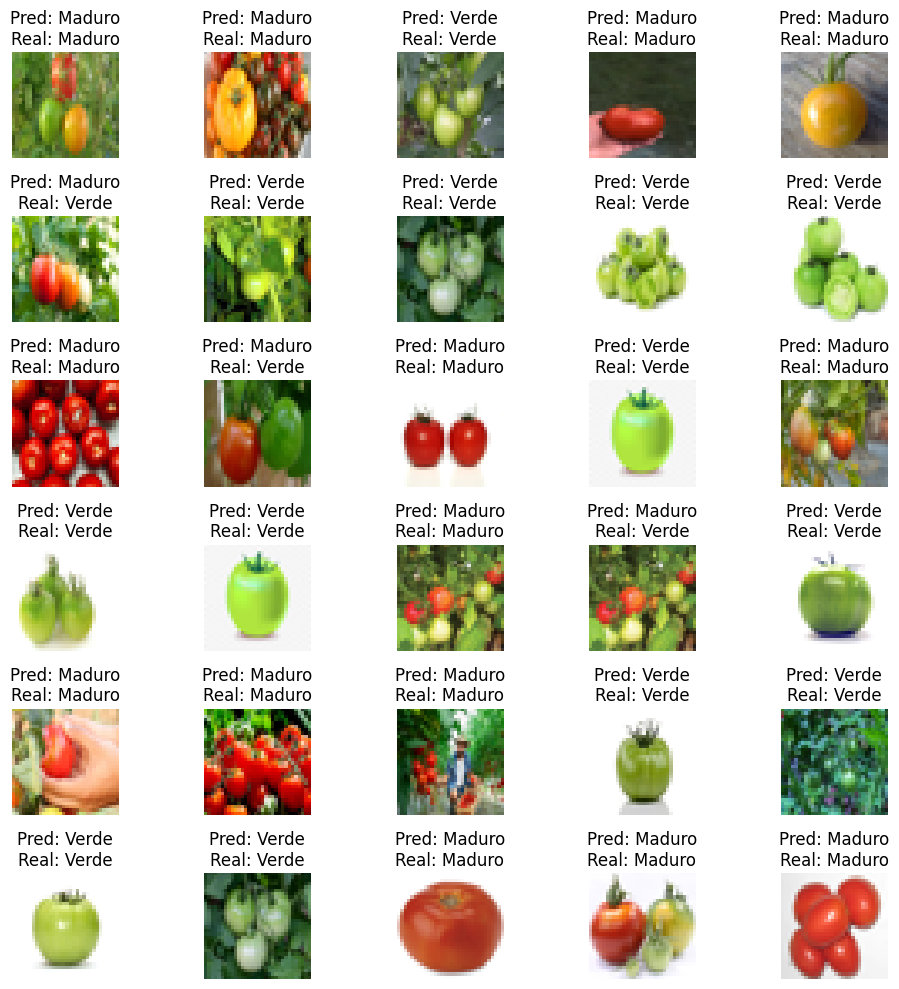

In [110]:
predictions = model.predict(data_test)
predictions = (predictions > 0.5).astype('int32')

fig, axs = plt.subplots(6, 5, figsize=(10, 10))
axs = axs.ravel()

for i in range(30):
    axs[i].imshow(data_test[i])
    axs[i].set_title(f"Pred: {'Maduro' if predictions[i][0] == 1 else 'Verde'}\nReal: {'Maduro' if labels_test[i] == 1 else 'Verde'}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

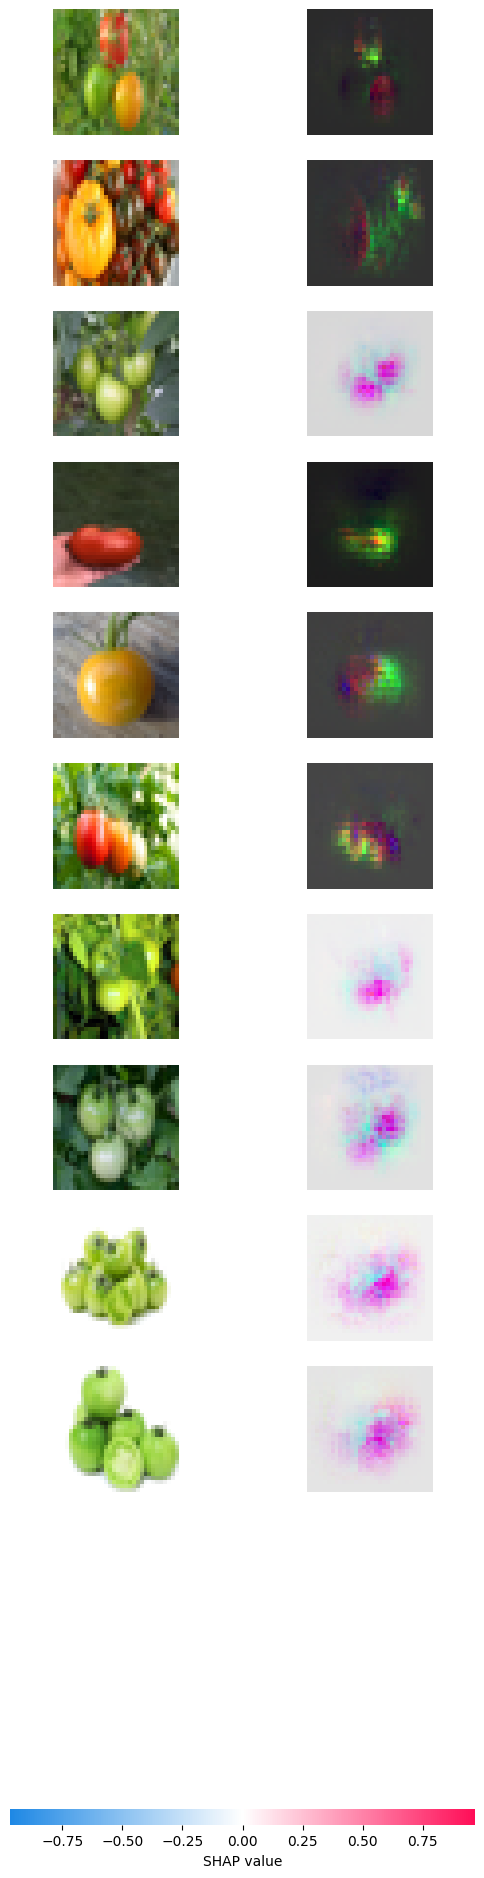

In [111]:


import shap


def normalize_shap_values(shap_values, epsilon=1e-8):
    normalized_shap = []
    for val in shap_values:
        min_val = np.min(val)
        max_val = np.max(val)
        # Evitar divisão por zero
        range_val = max_val - min_val + epsilon
        normalized_shap.append((val - min_val) / range_val)  # Normalizar para o intervalo [0, 1]
    return np.array(normalized_shap)

# Implementação do SHAP
background = data_train[np.random.choice(data_train.shape[0], 100, replace=False)]
explainer = shap.DeepExplainer(model, background)

# Explicar as previsões para as primeiras 10 imagens de teste
shap_values = explainer.shap_values(data_test[:10])

# Normalizar os valores SHAP para o intervalo [0, 1]
normalized_shap_values = normalize_shap_values(shap_values)

# mostrar as explicações de SHAP normalizadas
shap.image_plot(normalized_shap_values, data_test[:10])
